In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('data/diamonds.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## No missing values observed in the data

In [34]:
df = df.drop(labels=['id'] , axis=1)

In [35]:
df = df.drop(labels= ['table'] , axis=1 )

In [36]:
df

,carat,cut,color,clarity,depth,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,2757,6.15,6.12,3.74


In [37]:
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes == 'object']

print("Num_Columns:" , numerical_columns)
print("Cat_Columns:" , categorical_columns)


Num_Columns: Index(['carat', 'depth', 'price', 'x', 'y', 'z'], dtype='object')
Cat_Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [38]:
df[categorical_columns].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [39]:
df[numerical_columns].describe()

,carat,depth,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,18823.000000,10.740000,58.900000,31.800000


In [40]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [41]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [42]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

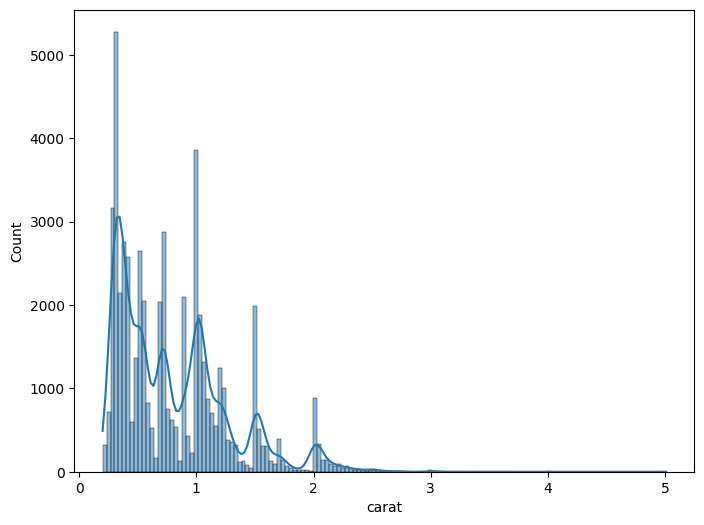

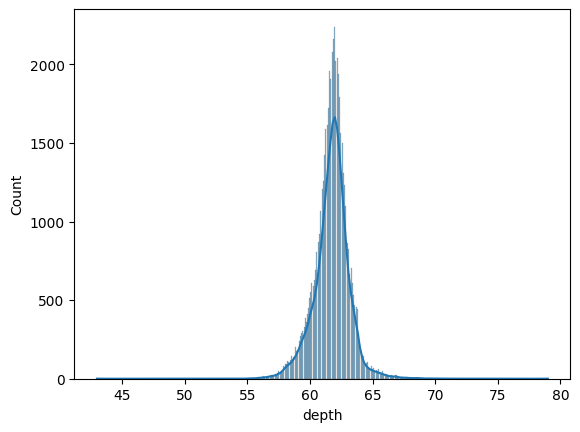

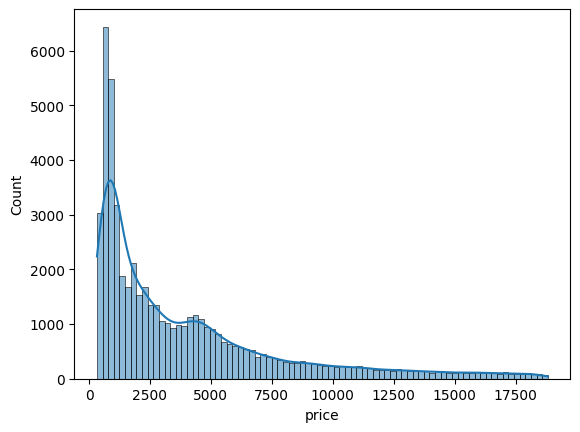

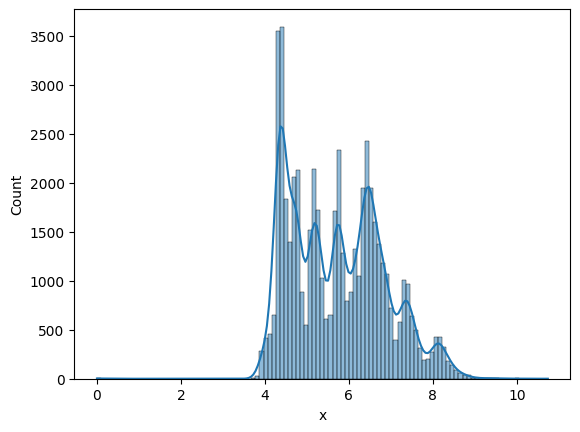

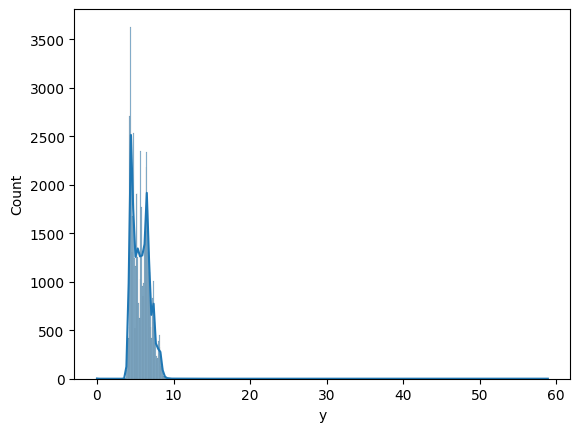

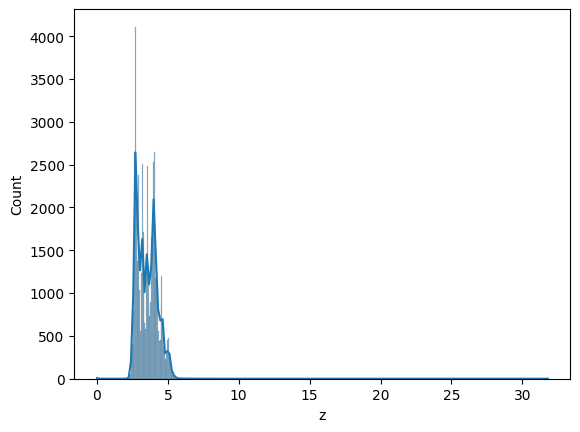

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))

for i in numerical_columns:
    sns.histplot(data=df , x = i , kde = True)
    print('\n')
    plt.show()

In [47]:
print(categorical_columns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [51]:
df['cut'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: cut, Length: 53940, dtype: bool

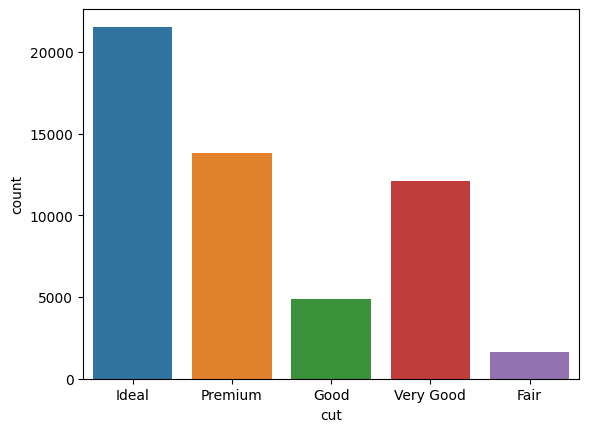

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='cut', data=df)
plt.show()

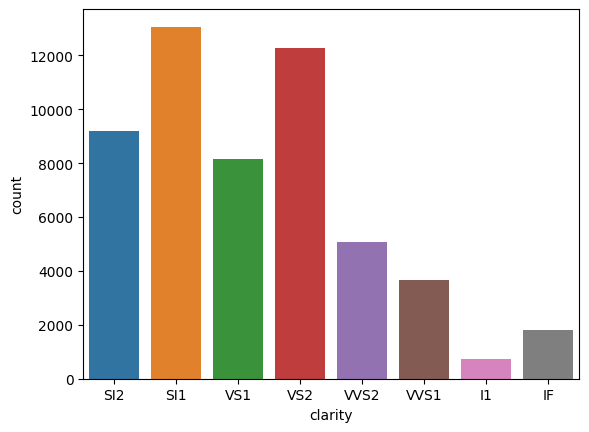

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='clarity', data=df)
plt.show()

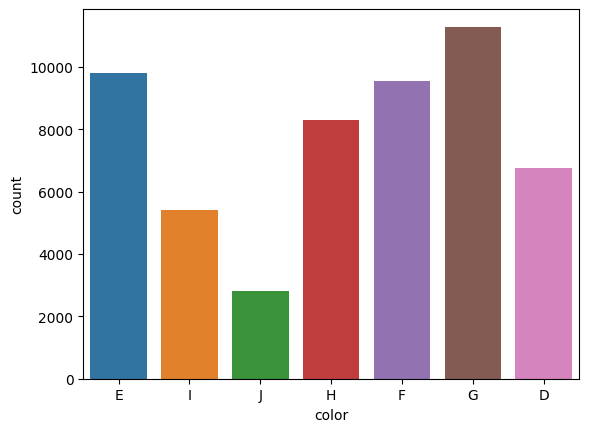

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='color', data=df)
plt.show()

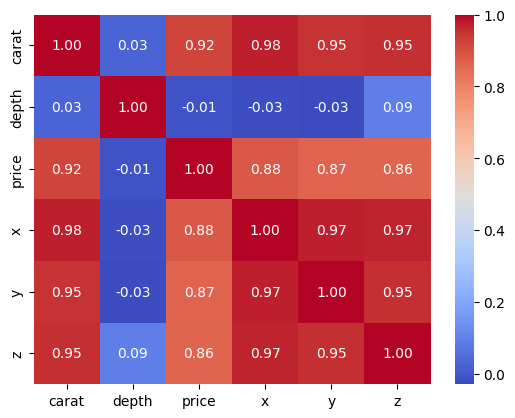

In [60]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
